In [1]:
from fitter import Fitter, get_common_distributions, get_distributions
import os
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.optimize import curve_fit
import scipy.stats as stats
from scipy.stats import epps_singleton_2samp as epps
import statsmodels
import statsmodels.api as sm
import seaborn as sns

Formatter for the visualization

In [2]:
def append_percentage(x, pos):
    del pos
    return str(int(x))+str('%')

def formatter(x, pos):
    del pos
    return str(int(x*100))+str('%')

In [ ]:
# sns.set(
#     context="paper",
#     style="darkgrid",
#     palette="pastel",
#     rc={"figure.dpi": 150}
# )
# sns.set_context("paper", font_scale=1.5)

In [4]:
def use_fitter(data):
    # Initialize the fitter object
    # f = Fitter(data, distributions='common')
    f = Fitter(data)

    # Fit common distributions
    f.fit(get_common_distributions())

    # Print the summary of the fitted distributions
    print(f.summary())

    print (f.get_best(method = 'sumsquare_error'))
    print (f.get_best(method = 'aic'))
    print (f.get_best(method = 'bic'))
    # print (f.get_best(method = 'kl_div'))
    print (f.get_best(method = 'ks_statistic'))
    print (f.get_best(method = 'ks_pvalue'))

# PostFixExposureTimeMaintained

In [3]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "mttr"), "mttr.csv")
print (data_file)
df_combined_maintained = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'total_duration', 'total_post_fix_exposure_time', 'ratio', 'avg_total_duration', 'avg_post_fix_exposure_time', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_combined_maintained.shape[0]
print (df_combined_maintained.shape)
display(df_combined_maintained.head())

/home/imranur/security-metrics/code/visualize-data/../../data/mttr/mttr.csv
(22513, 8)


,system_name,from_package_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio
0,CARGO,ahrs,826,247,0.299031,826.0,247.0,0.299031
1,CARGO,alloc_geiger,1534,1516,0.988266,1534.0,1516.0,0.988266
2,CARGO,almel,1682,9,0.005351,1682.0,9.0,0.005351
3,CARGO,amp,1637,375,0.229078,1637.0,375.0,0.229078
4,CARGO,broot,1571,563,0.358370,1571.0,563.0,0.358370


In [4]:
df_combined_maintained = df_combined_maintained.dropna()

In [5]:
df_combined_maintained = df_combined_maintained[ df_combined_maintained.total_post_fix_exposure_time != 0 ]
df_combined_maintained

,system_name,from_package_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio
0,CARGO,ahrs,826,247,0.299031,826.000000,247.000000,0.299031
1,CARGO,alloc_geiger,1534,1516,0.988266,1534.000000,1516.000000,0.988266
2,CARGO,almel,1682,9,0.005351,1682.000000,9.000000,0.005351
3,CARGO,amp,1637,375,0.229078,1637.000000,375.000000,0.229078
4,CARGO,broot,1571,563,0.358370,1571.000000,563.000000,0.358370
...,...,...,...,...,...,...,...,...
22508,PYPI,zqpy,4572,1817,0.397419,1143.000000,454.250000,0.397419
22509,PYPI,zsl,2377,696,0.292806,1188.500000,348.000000,0.292806
22510,PYPI,zucchini,7127,2128,0.298583,2375.666667,709.333333,0.298583
22511,PYPI,zuul,1720,20,0.011628,1720.000000,20.000000,0.011628


In [6]:
df_combined_maintained.groupby(by=['system_name']).describe()

total_duration                                                  \
                     count         mean          std   min     25%     50%   
system_name                                                                  
CARGO                 92.0  1212.597826   663.616897  70.0   699.5  1235.5   
NPM                17263.0  2110.434455  2145.684435   1.0  1045.0  1541.0   
PYPI                5158.0  2111.639977  2584.782846   1.0   859.0  1397.0   

                              total_post_fix_exposure_time              ...  \
                 75%      max                        count        mean  ...   
system_name                                                             ...   
CARGO        1544.75   2953.0                         92.0  219.380435  ...   
NPM          2409.00  43084.0                      17263.0  620.690436  ...   
PYPI         2409.00  36604.0                       5158.0  578.530438  ...   

            avg_post_fix_exposure_time         avg_ratio                      \
                                   75%     max     count      mean       std   
system_name                                                                    
CARGO                         313.7500  1516.0      92.0  0.211446  0.255399   
NPM                           614.0000  3395.0   17263.0  0.316707  0.284607   
PYPI                          397.1875  2733.0    5158.0  0.313956  0.278196   

                                                          
                  min       25%       50%       75%  max  
system_name                                               
CARGO        0.000826  0.030321  0.091390  0.285675  1.0  
NPM          0.000242  0.093107  0.217178  0.488505  1.0  
PYPI         0.000510  0.094787  0.227258  0.460691  1.0  

[3 rows x 48 columns]

In [7]:
df_combined_maintained.groupby(by=['system_name'])['avg_post_fix_exposure_time'].describe()

,count,mean,std,min,25%,50%,75%,max
system_name,,,,,,,,
CARGO,92.0,219.228261,305.965455,1.0,29.75,94.000000,313.7500,1516.0
NPM,17263.0,415.817283,423.272107,1.0,111.00,252.285714,614.0000,3395.0
PYPI,5158.0,281.235350,277.199696,1.0,82.00,198.000000,397.1875,2733.0


In [9]:
df_combined_maintained['avg_post_fix_exposure_time'].describe()

count    22513.000000
mean       384.179571
std        398.328122
min          1.000000
25%         99.500000
50%        233.000000
75%        555.000000
max       3395.000000
Name: avg_post_fix_exposure_time, dtype: float64

In [10]:
df_combined_maintained['avg_ratio'].describe()

count    22513.000000
mean         0.315647
std          0.283107
min          0.000242
25%          0.092631
50%          0.219911
75%          0.481339
max          1.000000
Name: avg_ratio, dtype: float64

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]

2024-09-29 14:23:33.563 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted exponnorm distribution with error=0.000434)
2024-09-29 14:23:33.564 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=0.000647)
Fitting 114 distributions:   1%|          | 1/114 [00:03<06:56,  3.68s/it]2024-09-29 14:23:33.568 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.000653)
2024-09-29 14:23:33.584 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-29 14:23:33.587 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted argus distribution with error=0.000682)
2024-09-29 14:23:33.592 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.0005)
2024-09-29 14:23:33.604 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted erlang distribution with error=0.000378)
2024-09-

             sumsquare_error          aic          bic  kl_div  ks_statistic  \
bradford            0.000363  1398.646857  1405.123506     inf      0.097000   
truncpareto         0.000364  1401.401711  1410.037244     inf      0.098204   
loglaplace          0.000368  1505.958516  1512.435165     inf      0.140222   
halfgennorm         0.000369  1455.320184  1461.796833     inf      0.117505   
fatiguelife         0.000371  1460.436535  1466.913184     inf      0.124955   

             ks_pvalue  
bradford      0.550902  
truncpareto   0.535202  
loglaplace    0.146587  
halfgennorm   0.314832  
fatiguelife   0.248890  
{'bradford': {'c': 30.45637604263043, 'loc': 0.9282801203085836, 'scale': 720.075433858955}}
{'vonmises': {'kappa': 0.43434125856161865, 'loc': -0.30612240773447397, 'scale': 1}}
{'vonmises': {'kappa': 0.43434125856161865, 'loc': -0.30612240773447397, 'scale': 1}}
{'gengamma': {'a': 1.0398932223437747, 'c': 0.6800185285431162, 'loc': 0.9999999999999999, 'scale': 170.

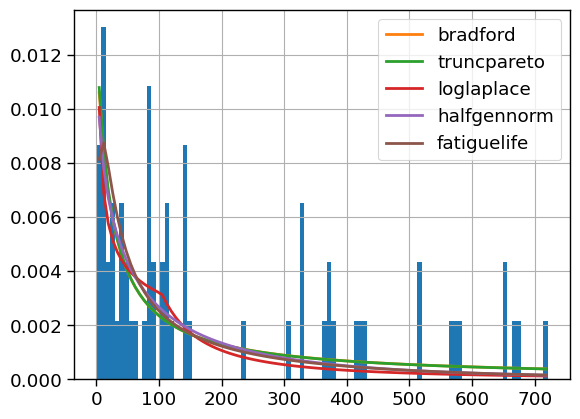

In [13]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='CARGO', 'avg_post_fix_exposure_time'].sort_values().to_numpy())

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]

2024-09-29 14:24:04.781 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-29 14:24:04.821 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.000267)
2024-09-29 14:24:04.843 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.000315)
2024-09-29 14:24:04.845 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.000299)
2024-09-29 14:24:04.862 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted halfcauchy distribution with error=0.000271)
2024-09-29 14:24:04.870 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_l distribution with error=0.000336)
Fitting 114 distributions:   5%|▌         | 6/114 [00:00<00:01, 57.30it/s]2024-09-29 14:24:04.889 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_r distribution with error=0.000295)
2

                  sumsquare_error          aic          bic    kl_div  \
johnsonsb                0.000247  1340.582646  1370.557197  0.197975   
beta                     0.000249  1333.589460  1363.564011  0.218750   
powerlaw                 0.000251  1344.440134  1366.921048  0.212183   
mielke                   0.000254  1331.936429  1361.910981  0.229123   
truncweibull_min         0.000254  1344.868231  1382.336420  0.232560   

                  ks_statistic      ks_pvalue  
johnsonsb             0.080340   5.597258e-75  
beta                  0.136682  8.856470e-217  
powerlaw              0.099238  2.944108e-114  
mielke                0.145879  5.158957e-247  
truncweibull_min      0.093153  1.060075e-100  
{'johnsonsb': {'a': 0.24292858199886702, 'b': 0.4652852037369446, 'loc': 0.31642983165896577, 'scale': 731.7947413560598}}
{'vonmises': {'kappa': 0.1986362382890105, 'loc': -2.4032116305795146, 'scale': 1}}
{'vonmises': {'kappa': 0.1986362382890105, 'loc': -2.4032116305795

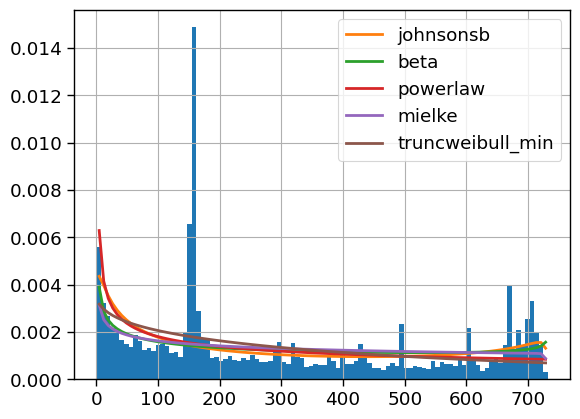

In [14]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='NPM', 'avg_post_fix_exposure_time'].sort_values().to_numpy())

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]2024-09-29 14:24:36.292 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-29 14:24:36.319 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=2.5e-05)
2024-09-29 14:24:36.350 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=7.2e-05)
2024-09-29 14:24:36.371 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=8.6e-05)
Fitting 114 distributions:   4%|▍         | 5/114 [00:00<00:02, 49.22it/s]2024-09-29 14:24:36.384 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=7.6e-05)
2024-09-29 14:24:36.391 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution with error=0.001818)
2024-09-29 14:24:36.394 | INFO     | fitter.fitter:_fit_single_distribution:33

             sumsquare_error          aic          bic  kl_div  ks_statistic  \
chi                  0.00002  1413.632462  1432.548172     inf      0.027041   
beta                 0.00002  1404.641016  1429.861964     inf      0.023134   
nakagami             0.00002  1413.200259  1432.115969     inf      0.028048   
truncpareto          0.00002  1397.211394  1422.432341     inf      0.034914   
exponpow             0.00002  1414.545173  1433.460884     inf      0.030158   

             ks_pvalue  
chi           0.005295  
beta          0.025933  
nakagami      0.003377  
truncpareto   0.000102  
exponpow      0.001248  
{'chi': {'df': 0.8706979917337494, 'loc': 0.9999999999999998, 'scale': 322.91122603659244}}
{'vonmises': {'kappa': 0.08604378307251768, 'loc': 1.8909940995422456, 'scale': 1}}
{'vonmises': {'kappa': 0.08604378307251768, 'loc': 1.8909940995422456, 'scale': 1}}
{'beta': {'a': 0.8805375879304249, 'b': 2.0280410048798356, 'loc': 0.9999999999999999, 'scale': 788.364828767

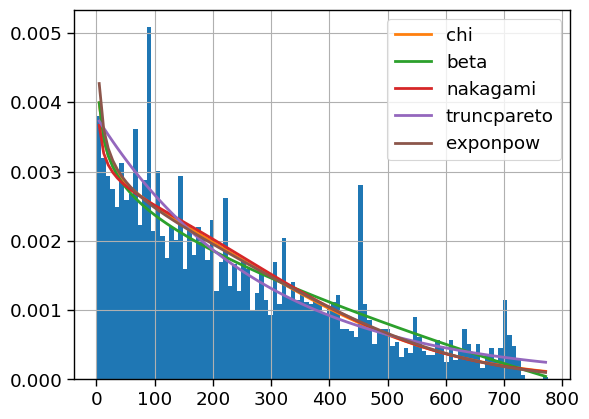

In [15]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='PYPI', 'avg_post_fix_exposure_time'].sort_values().to_numpy())

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]

2024-09-29 14:25:07.370 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-29 14:25:07.427 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.000211)
2024-09-29 14:25:07.440 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=0.000229)
2024-09-29 14:25:07.477 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=0.000229)
Fitting 114 distributions:   4%|▎         | 4/114 [00:00<00:03, 33.87it/s]2024-09-29 14:25:07.501 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted halfcauchy distribution with error=0.000181)
2024-09-29 14:25:07.517 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_l distribution with error=0.000249)
2024-09-29 14:25:07.551 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_r distribution with error=0.000205)


            sumsquare_error          aic          bic  kl_div  ks_statistic  \
beta               0.000171  1371.193003  1402.246225     inf      0.085482   
gausshyper         0.000171  1367.840383  1414.420216     inf      0.069511   
exponweib          0.000172  1390.845025  1421.898247     inf      0.069392   
chi                0.000172  1387.011472  1410.301389     inf      0.056629   
nakagami           0.000173  1385.188629  1408.478546     inf      0.064634   

                ks_pvalue  
beta        5.780558e-111  
gausshyper   1.760940e-73  
exponweib    3.125310e-73  
chi          6.744000e-49  
nakagami     1.395121e-63  
{'beta': {'a': 0.8282334269090306, 'b': 1.7757252161648351, 'loc': 0.9999999999999999, 'scale': 948.3579210173191}}
{'vonmises': {'kappa': 0.14340662196750145, 'loc': -2.5218341365901704, 'scale': 1}}
{'vonmises': {'kappa': 0.14340662196750145, 'loc': -2.5218341365901704, 'scale': 1}}
{'chi': {'df': 0.8304340355578743, 'loc': 0.9999999999999999, 'scale': 

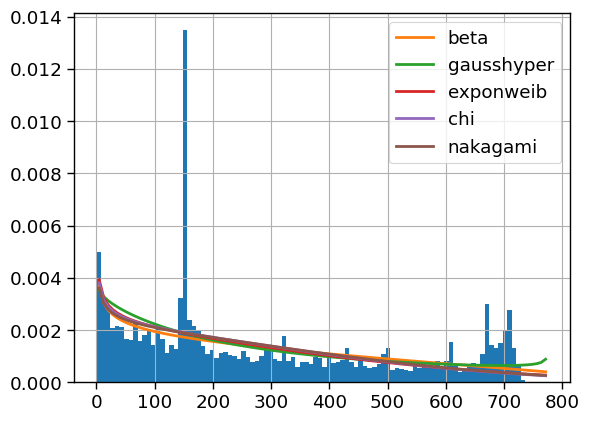

In [16]:
use_fitter(df_combined_maintained['avg_post_fix_exposure_time'].sort_values().to_numpy())

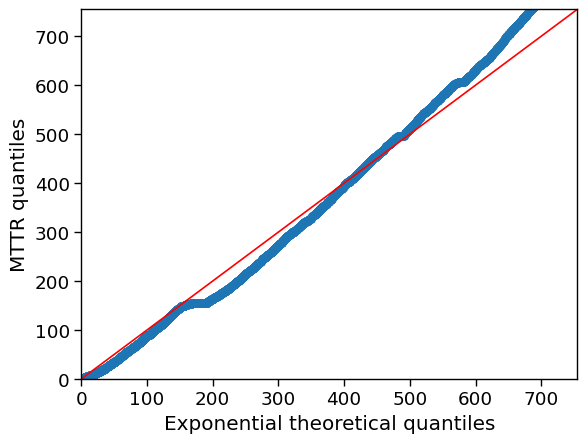

In [11]:
# fig, ax = plt.subplots(figsize=(6.4, 3.2))
loc, scale = stats.expon.fit(df_combined_maintained['avg_post_fix_exposure_time'].sort_values().to_numpy())
h= sm.qqplot(df_combined_maintained['avg_post_fix_exposure_time'].sort_values().to_numpy(),
             stats.expon, loc=loc, scale=scale, line='45', markerfacecolor='b')
h.axes[0].set_xlim([0, 755])
h.axes[0].set_ylim([0, 755])
h.axes[0].set_xlabel('Exponential theoretical quantiles')
h.axes[0].set_ylabel('MTTR quantiles')
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttr"), "mttr_qq_plot.pdf")
plt.savefig(data_file, bbox_inches='tight')

/tmp/ipykernel_931384/753758130.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_combined_maintained, x='avg_post_fix_exposure_time', y='system_name', inner='quartile',


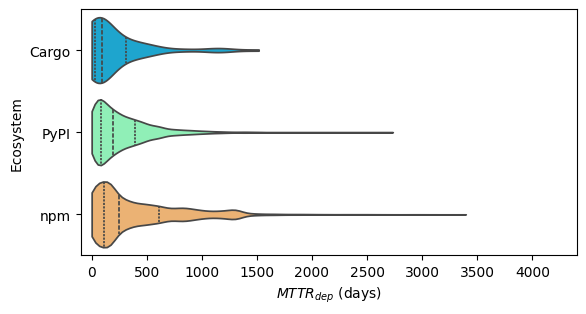

In [5]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttr"), "mttr.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))

# Reorder the violin plots to show CARGO, PYPI, NPM
custom_order = ['CARGO', 'PYPI', 'NPM']
df_combined_maintained['system_name'] = pd.Categorical(df_combined_maintained['system_name'], custom_order)

# Create a mapping dictionary for the display names
name_mapping = {'CARGO': 'Cargo', 'PYPI': 'PyPI', 'NPM': 'npm'}
df_combined_maintained['system_name'] = df_combined_maintained['system_name'].map(name_mapping)

ax = sns.violinplot(data=df_combined_maintained, x='avg_post_fix_exposure_time', y='system_name', inner='quartile',
                    palette='rainbow', cut=0)

ax.set_xbound(-100, 4400)
ax.set_xlabel('$MTTR_{dep}$ (days)')
ax.set_ylabel('Ecosystem')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

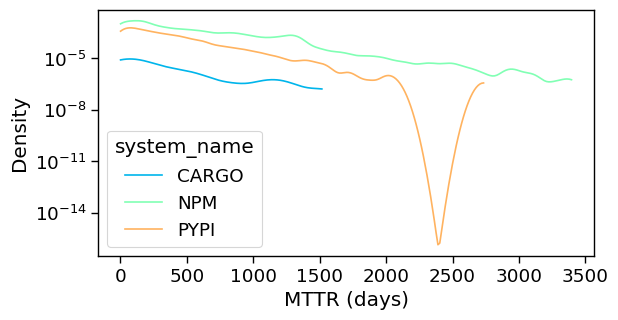

In [13]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttr"), "mttr_kde.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.kdeplot(data=df_combined_maintained, x='avg_post_fix_exposure_time', hue='system_name',
                palette='rainbow', cut=0)

ax.set_ylabel('Density')
ax.set_xlabel('MTTR (days)')
ax.set_yscale('log')
plt.savefig(data_file, bbox_inches='tight')

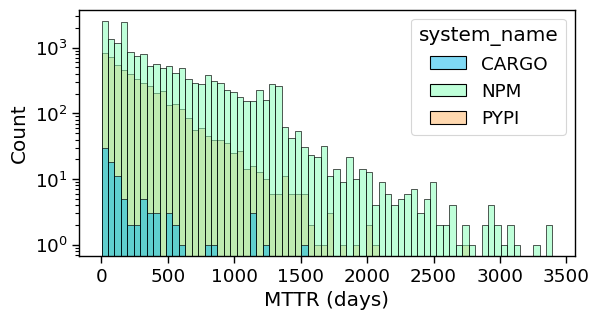

In [14]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttr"), "mttr_hist.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.histplot(data=df_combined_maintained, x='avg_post_fix_exposure_time', hue='system_name',
                palette='rainbow', bins=70)
# ax.set_ylabel('Density')
ax.set_xlabel('MTTR (days)')
ax.set_yscale('log')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]

2024-09-29 14:29:01.208 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-29 14:29:01.219 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=498.794912)
2024-09-29 14:29:01.229 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=465.836487)
2024-09-29 14:29:01.230 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=432.097268)
2024-09-29 14:29:01.235 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=500.053429)
/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.f

            sumsquare_error         aic         bic  kl_div  ks_statistic  \
johnsonsb        297.898845  179.257487  187.893019     inf      0.322987   
wrapcauchy       354.717817   95.784530  102.261179     inf      0.171875   
beta             359.025371  151.404990  160.040522     inf      0.386049   
arcsine          376.371721   69.457430   73.775196     inf      0.206238   
powerlaw         399.658995   60.773109   67.249758     inf      0.196034   

               ks_pvalue  
johnsonsb   1.924635e-06  
wrapcauchy  4.013834e-02  
beta        4.286483e-09  
arcsine     7.273076e-03  
powerlaw    1.248456e-02  
{'johnsonsb': {'a': 0.3942951186034441, 'b': 0.16352454971723315, 'loc': 0.001519155434142529, 'scale': 0.9984808445658582}}
{'uniform': {'loc': 0.0016750418760469, 'scale': 0.998324958123953}}
{'uniform': {'loc': 0.0016750418760469, 'scale': 0.998324958123953}}
{'weibull_min': {'c': 0.7418827012193148, 'loc': 0.0016750418760468997, 'scale': 0.3646076699208104}}
{'genhyper

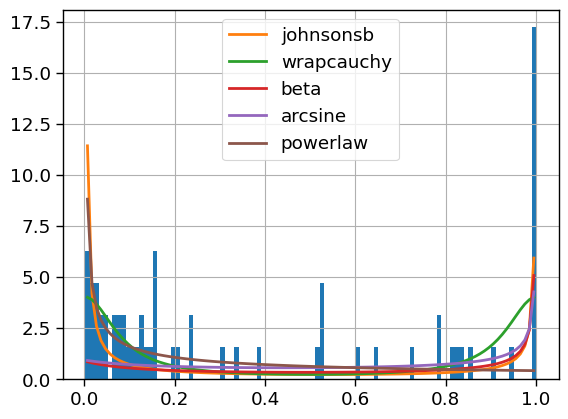

In [21]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='CARGO', 'avg_ratio'].sort_values().to_numpy())

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]2024-09-29 14:29:32.114 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-29 14:29:32.153 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=672.638841)
/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.

             sumsquare_error         aic         bic    kl_div  ks_statistic  \
arcsine           504.903712   38.014594   53.001870  0.462754      0.245725   
rdist             518.882805   38.715816   61.196729  0.471413      0.245725   
beta              519.826296   87.856441  117.830992  0.502004      0.251941   
johnsonsb         582.505032  616.759092  646.733643  0.975362      0.667753   
weibull_max       597.791981   92.189202  114.670116  0.885717      0.245725   

             ks_pvalue  
arcsine            0.0  
rdist              0.0  
beta               0.0  
johnsonsb          0.0  
weibull_max        0.0  
{'arcsine': {'loc': -0.007211148317794942, 'scale': 1.0072111483177952}}
{'uniform': {'loc': 0.0013736263736263, 'scale': 0.9986263736263737}}
{'uniform': {'loc': 0.0013736263736263, 'scale': 0.9986263736263737}}
{'recipinvgauss': {'mu': 0.6025957070338783, 'loc': -0.1137884919798767, 'scale': 0.23358533787178043}}
{'wrapcauchy': {'c': 0.398460116860336, 'loc': 0.001

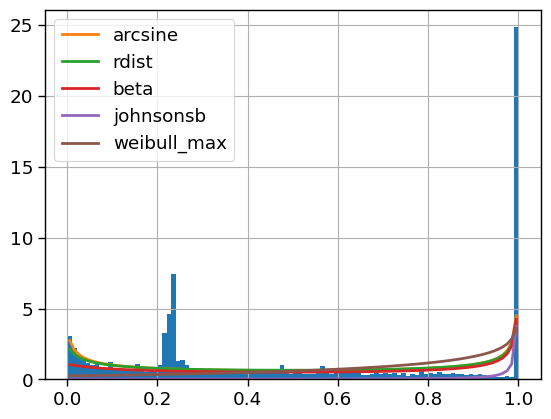

In [22]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='NPM', 'avg_ratio'].sort_values().to_numpy())

Fitting 114 distributions:   1%|          | 1/114 [00:03<06:44,  3.58s/it]2024-09-29 15:39:37.543 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=120.746654)
2024-09-29 15:39:37.544 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=119.769992)
2024-09-29 15:39:37.545 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=128.178103)
2024-09-29 15:39:37.550 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=111.536249)
2024-09-29 15:39:37.554 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted arcsine distribution with error=71.685548)
2024-09-29 15:39:37.582 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi distribution with error=106.574245)
2024-09-29 15:39:37.589 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted dgamma distribution with error=121.208883)
2024-0

            sumsquare_error        aic        bic    kl_div  ks_statistic  \
arcsine           71.685548  69.502792  82.113266  0.267916      0.206232   
rdist             81.749702  15.117596  34.033306  0.187107      0.102349   
gausshyper        87.988386  27.699367  65.530788  0.297624      0.191164   
kappa4            97.812584   8.790068  34.011015  0.184072      0.103618   
genpareto         98.011415   9.250225  28.165935  0.238875      0.157206   

                ks_pvalue  
arcsine     2.351720e-151  
rdist        2.415767e-37  
gausshyper  6.223057e-130  
kappa4       2.883618e-38  
genpareto    8.831981e-88  
{'arcsine': {'loc': -0.11114275222876885, 'scale': 1.1111427522287691}}
{'uniform': {'loc': 0.0014409221902017, 'scale': 0.9985590778097982}}
{'uniform': {'loc': 0.0014409221902017, 'scale': 0.9985590778097982}}
{'exponpow': {'b': 1.0209156311951542, 'loc': 0.0014320594494083455, 'scale': 0.7410330736167003}}
{'johnsonsb': {'a': 0.2611527040686889, 'b': 0.08127775280

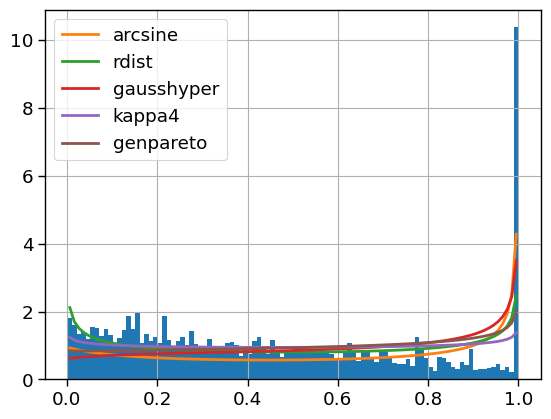

In [24]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='PYPI', 'avg_ratio'].sort_values().to_numpy())

Fitting 114 distributions:   0%|          | 0/114 [00:00<?, ?it/s]2024-09-29 15:40:19.013 | WARNING  | fitter.fitter:_fit_single_distribution:337 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-09-29 15:40:19.056 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=510.829569)
2024-09-29 15:40:19.058 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=489.913854)
2024-09-29 15:40:19.069 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=503.353651)
2024-09-29 15:40:19.084 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted halfcauchy distribution with error=491.654923)
2024-09-29 15:40:19.088 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gumbel_l distribution with error=512.227439)
2024-09-29 15:40:19.103 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cosine distribution with error=505.303688)

             sumsquare_error         aic         bic    kl_div  ks_statistic  \
johnsonsb         245.083676  307.816943  338.870165  0.734361      0.417907   
weibull_max       254.099780  206.308255  229.598171  0.988278      0.262515   
arcsine           364.748051   68.590724   84.117335  0.433514      0.212092   
beta              387.113065   74.439091  105.492313  0.400093      0.229666   
rdist             415.477479   16.911486   40.201402  0.375081      0.212092   

             ks_pvalue  
johnsonsb          0.0  
weibull_max        0.0  
arcsine            0.0  
beta               0.0  
rdist              0.0  
{'johnsonsb': {'a': -0.681830005720927, 'b': 0.12079368682260011, 'loc': -0.10033392300622229, 'scale': 1.1003339230062226}}
{'uniform': {'loc': 0.0013736263736263, 'scale': 0.9986263736263737}}
{'uniform': {'loc': 0.0013736263736263, 'scale': 0.9986263736263737}}
{'invgauss': {'mu': 0.32606768296935196, 'loc': -0.22412878208791587, 'scale': 2.2029005259469736}}
{'ka

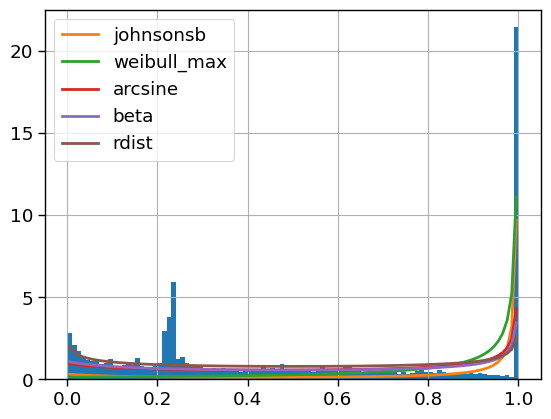

In [25]:
use_fitter(df_combined_maintained['avg_ratio'].sort_values().to_numpy())

/tmp/ipykernel_165342/3600663133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_combined_maintained, x='avg_ratio', y='system_name', inner='quartile', palette='rainbow', cut=0)


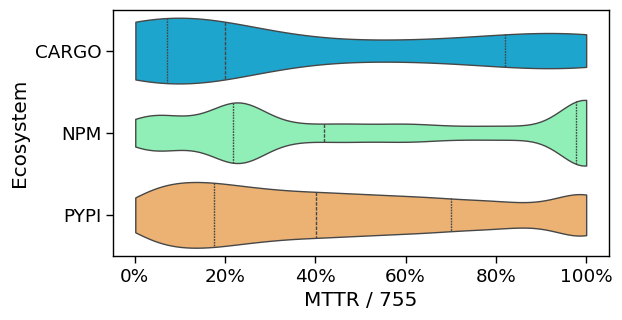

In [26]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttr"), "mttr_ratio.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.violinplot(data=df_combined_maintained, x='avg_ratio', y='system_name', inner='quartile', palette='rainbow', cut=0)

ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Ecosystem')
ax.set_xlabel('MTTR / 755')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

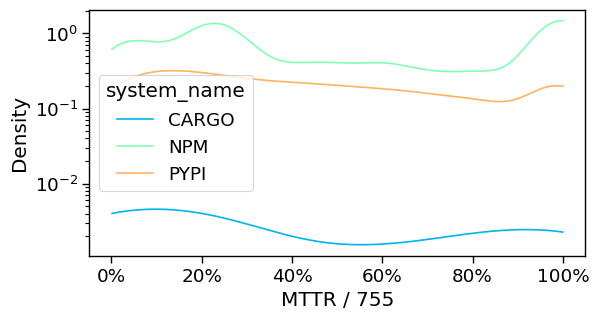

In [27]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttr"), "mttr_ratio_kde.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.kdeplot(data=df_combined_maintained, x='avg_ratio', hue='system_name', palette='rainbow', cut=0)

ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Density')
ax.set_xlabel('MTTR / 755')
ax.set_yscale('log')
plt.savefig(data_file, bbox_inches='tight')

Cumulative Percentage Graph

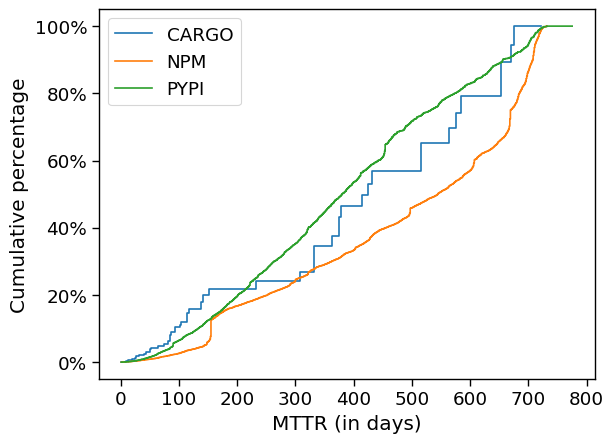

In [28]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttr"), "mttr_cum_percentage_pfet.pdf")

for system_name in df_combined_maintained.system_name.unique():
    df_cpg = df_combined_maintained[df_combined_maintained['system_name']==system_name].sort_values(by='avg_post_fix_exposure_time')
    df_cpg['cumulative_sum'] = df_cpg['avg_post_fix_exposure_time'].cumsum()
    df_cpg['cumulative_percentage'] = 100 * df_cpg['cumulative_sum'] / df_cpg['avg_post_fix_exposure_time'].sum()
    plt.plot(df_cpg['avg_post_fix_exposure_time'], df_cpg['cumulative_percentage'], drawstyle='steps', label=system_name)

ax.yaxis.set_major_formatter(append_percentage)
plt.xlabel('MTTR (in days)')
plt.ylabel('Cumulative percentage')
# plt.title('Cumulative Percentage Graph (Maintained)')
plt.legend()
plt.savefig(data_file)

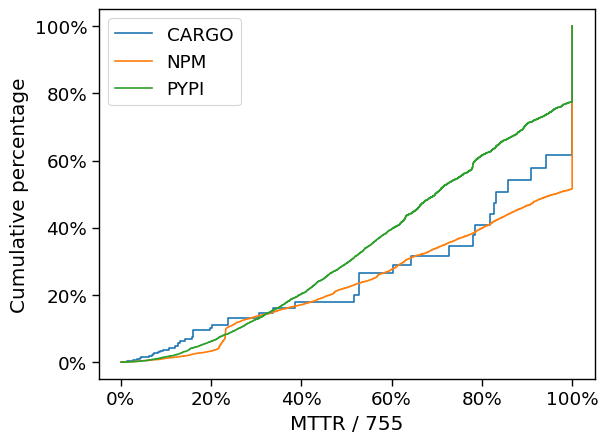

/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/home/imranur/security-metrics/secmet_venv/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:1260: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [29]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttr"), "mttr_cum_percentage_ratio.pdf")

for system_name in df_combined_maintained.system_name.unique():
    df_cpg = df_combined_maintained[df_combined_maintained['system_name']==system_name].sort_values(by='avg_ratio')
    df_cpg['cumulative_sum'] = df_cpg['avg_ratio'].cumsum()
    df_cpg['cumulative_percentage'] = 100 * df_cpg['cumulative_sum'] / df_cpg['avg_ratio'].sum()
    plt.plot(df_cpg['avg_ratio'], df_cpg['cumulative_percentage'], drawstyle='steps', label=system_name)

ax.yaxis.set_major_formatter(append_percentage)
ax.xaxis.set_major_formatter(formatter)
plt.xlabel('MTTR / 755')
plt.ylabel('Cumulative percentage')
# plt.title('Cumulative Percentage Graph (Maintained)')
plt.legend()
plt.savefig(data_file)

## Load MTTR

In [3]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "mttr"), "mttr_weighted.csv")
print (data_file)
df_pfet = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'mttr_expo_weighted', 'mttr_inverse_weighted'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_pfet.shape[0]
print (df_pfet.shape)
display(df_pfet.head())

/home/imranur/security-metrics/code/visualize-data/../../data/mttr/mttr_weighted.csv
(23132, 4)


,system_name,from_package_name,mttr_expo_weighted,mttr_inverse_weighted
0,CARGO,ahrs,36.0526993005824672,36.02860654395707559855
1,CARGO,alloc_geiger,54.7168492822226318,58.68176648241368966030
2,CARGO,almel,2.9962037381311793,2.99309165644807516156
3,CARGO,amp,56.8227934271684876,64.47427516844615452704
4,CARGO,broot,11.8998697836120124,12.28989379959406443391


In [4]:
df_pfet = df_pfet.dropna()

In [6]:
df_pfet['mttr_inverse_weighted'] = pd.to_numeric(df_pfet['mttr_inverse_weighted'], errors='coerce')
# df_pfet = df_pfet[df_pfet['mttr_inverse_weighted'].round(2) > 0.00]

In [7]:
df_pfet['mttr_expo_weighted'] = pd.to_numeric(df_pfet['mttr_expo_weighted'], errors='coerce')
# df_pfet = df_pfet[df_pfet['mttr_expo_weighted'].round(2) > 0.00]

In [8]:
display(df_pfet[['system_name', 'mttr_inverse_weighted']].groupby(by=['system_name']).describe())

mttr_inverse_weighted                                        \
                            count       mean        std  min        25%   
system_name                                                               
CARGO                       104.0  37.619741  65.905901  0.0   6.249120   
NPM                       17634.0  49.120408  80.347631  0.0   6.049263   
PYPI                       5364.0  37.669389  41.273459  0.0  11.716809   

                                               
                   50%        75%         max  
system_name                                    
CARGO        24.116536  38.669798  516.000000  
NPM          16.688179  49.022969  878.994011  
PYPI         26.474991  50.011285  671.990551

In [9]:
display(df_pfet[['system_name', 'mttr_expo_weighted']].groupby(by=['system_name']).describe())

mttr_expo_weighted                                        \
                         count       mean        std  min        25%   
system_name                                                            
CARGO                    104.0  35.412061  60.908706  0.0   6.341085   
NPM                    17634.0  39.723448  54.482749  0.0  10.801365   
PYPI                    5364.0  34.439179  36.343550  0.0  12.399957   

                                          
                   50%        75%    max  
system_name                               
CARGO        24.294207  40.090578  516.0  
NPM          22.620614  42.319754  876.0  
PYPI         24.183244  45.320947  493.0

In [10]:
print(df_pfet.groupby(by=['system_name'])['mttr_expo_weighted'].describe().to_latex(columns=['count', 'mean', 'std', 'min', 'max'], float_format="%.0f", bold_rows=False, label="tab:statistics", caption="Statistics of the MTTR per system."))

\begin{table}
\caption{Statistics of the MTTR per system.}
\label{tab:statistics}
\begin{tabular}{lrrrrr}
\toprule
 & count & mean & std & min & max \\
system_name &  &  &  &  &  \\
\midrule
CARGO & 104 & 35 & 61 & 0 & 516 \\
NPM & 17634 & 40 & 54 & 0 & 876 \\
PYPI & 5364 & 34 & 36 & 0 & 493 \\
\bottomrule
\end{tabular}
\end{table}



/tmp/ipykernel_1664804/3604280545.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_pfet, x='mttr_expo_weighted', y='system_name', inner='quartile',


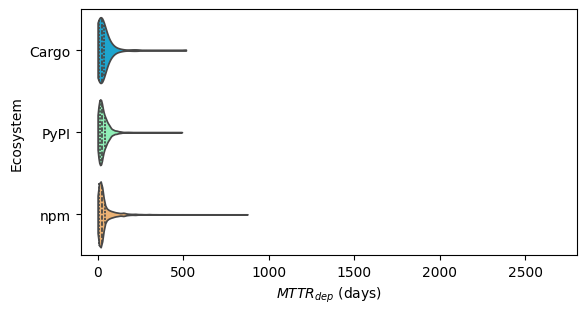

In [11]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "mttr"), "mttr_expo.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))

# Reorder the violin plots to show CARGO, PYPI, NPM
custom_order = ['CARGO', 'PYPI', 'NPM']
df_pfet['system_name'] = pd.Categorical(df_pfet['system_name'], custom_order)

# Create a mapping dictionary for the display names
name_mapping = {'CARGO': 'Cargo', 'PYPI': 'PyPI', 'NPM': 'npm'}
df_pfet['system_name'] = df_pfet['system_name'].map(name_mapping)

ax = sns.violinplot(data=df_pfet, x='mttr_expo_weighted', y='system_name', inner='quartile',
                    palette='rainbow', cut=0)

ax.set_xbound(-100, 2800)
ax.set_xlabel('$MTTR_{dep}$ (days)')
ax.set_ylabel('Ecosystem')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')